In [1]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [6]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 35.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=fb51686f7912971a72fd5f24411e792455c25af7621a6366469f0c559572b707
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [9]:
!pip install sklearn.datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.datasets (from versions: none)
ERROR: No matching distribution found for sklearn.datasets


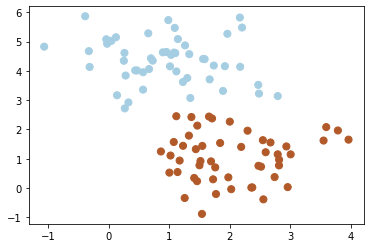

In [10]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap=plt.cm.Paired);

In [11]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=100)
clf.fit(X,y)

SVC(C=100, kernel='linear')

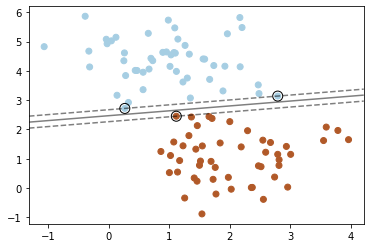

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T

#decision_function(self, X) evaluates the decision function for the samples in X.
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [18]:
clf.support_vectors_

array([[0.26604148, 2.71915015],
       [2.79207378, 3.14029479],
       [1.1167688 , 2.45256061]])

## **Non Linear SVM**

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#from sklearn.svm import SVC

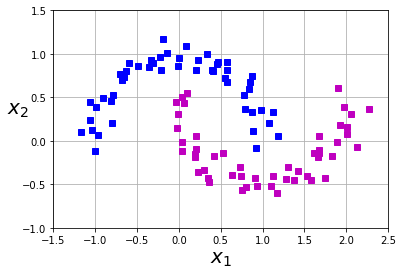

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.10, random_state=42)

#define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

#Let's have a look at the data we have generated
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [22]:
def plot_predictions(clf, axes):
  #create data in continuous linear space
  x0s= np.linspace(axes[0], axes[1], 100)
  x1s= np.linspace(axes[2], axes[3], 100)
  x0, x1= np.meshgrid(x0s,x1s)
  X=np.c_[x0.ravel(), x1.ravel()]
  y_pred= clf.predict(X).reshape(x0.shape)
  y_decision=clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [25]:
model = SVC(kernel="poly", degree=3, coef0=1, C=5)
model.fit(X,y)

SVC(C=5, coef0=1, kernel='poly')

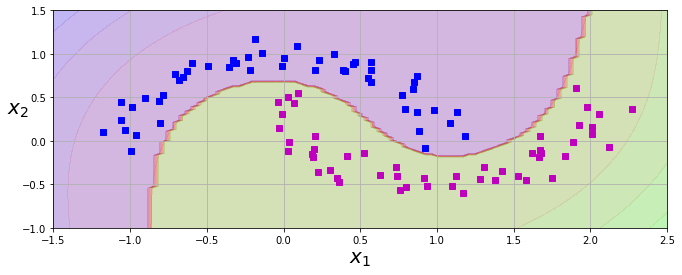

In [26]:
#plot the decision boundaries
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(model, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

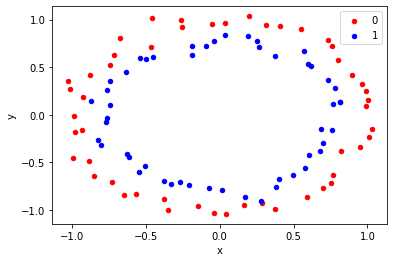

In [27]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [28]:
model = SVC(kernel="rbf",  C=1)
model.fit(X,y)

SVC(C=1)

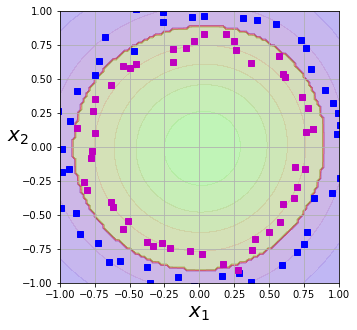

In [29]:
#plot the decision boundaries
plt.figure(figsize=(5, 5))

#plot the decision boundaries
plot_predictions(model, [-1.0, 1.0, -1, 1.0])

#plot the dataset
plot_dataset(X, y, [-1.0, 1.0, -1, 1.0])
plt.show()